In [1]:
import pandas as pd
import statsmodels.stats.multitest as multi

from CosinorPy import file_parser, cosinor, cosinor1
from CosinorPy.helpers import df_add_row
from RhythmCount import data_processing as dproc
from RhythmCount import plot

In [2]:
accidents = pd.read_csv("../PrometneNesreče.csv")

C:\Users\Hana\AppData\Local\Temp\ipykernel_49200\901670543.py:1: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("../PrometneNesreče.csv")


In [3]:
# Priprava podatkov
accidents['NastanekDatumCas'] = pd.to_datetime(accidents['NastanekDatumCas'], format='ISO8601', errors='coerce')
print(f"NastanekDatumCas column dtype: {accidents['NastanekDatumCas'].dtype}")

NastanekDatumCas column dtype: datetime64[ns]


# CosinorPy - poletje

In [4]:
summer_mask = accidents['NastanekDatumCas'].dt.month.isin([6, 7, 8])

summer_accidents = accidents[summer_mask]
# print(f"NastanekDatumCas column dtype: {summer_accidents['NastanekDatumCas'].dtype}")

hours = summer_accidents['NastanekDatumCas'].dt.hour

accidents_per_hour = hours.value_counts()
accidents_per_hour = accidents_per_hour.sort_index()

# Ustvari pandas dataframe v formatu, ki bo primeren za uporabo CosinorPy
df_plot = pd.DataFrame({
    "test": "HourlyAccidentsSummer",  # konstantna oznaka vseh vrstic
    "x": accidents_per_hour.index,  # Ura (od 0 do 23)
    "y": accidents_per_hour.values  # Število nesreč za tisto uro
})

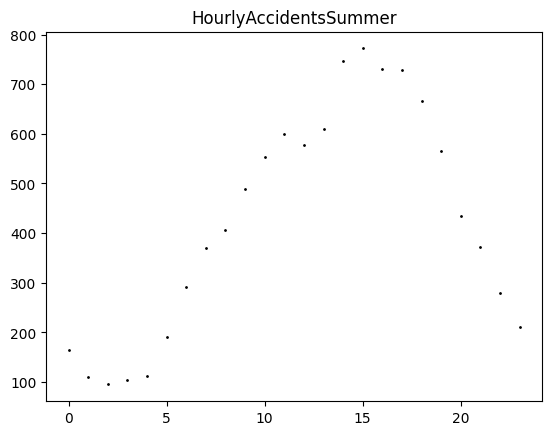

In [5]:
cosinor.plot_data(df_plot, names=["HourlyAccidentsSummer"])

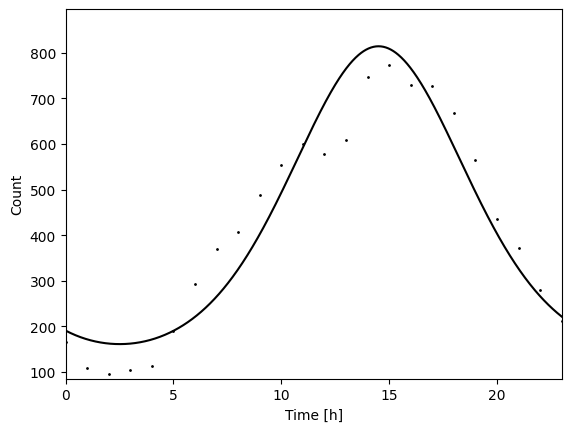

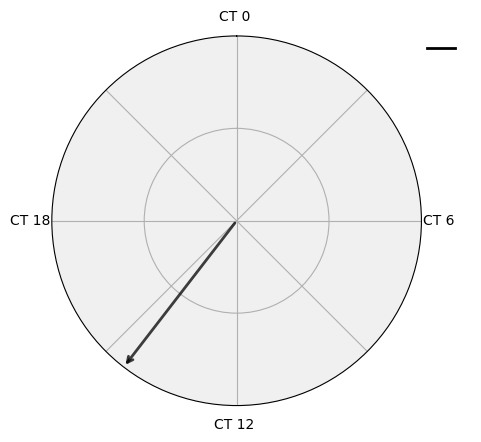

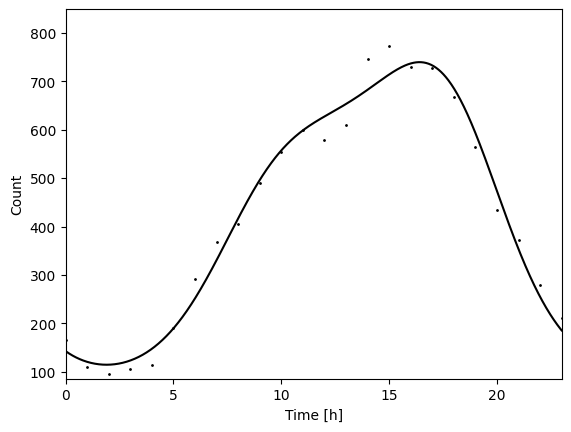

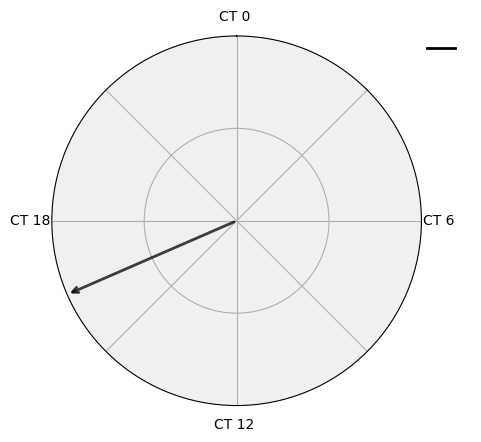

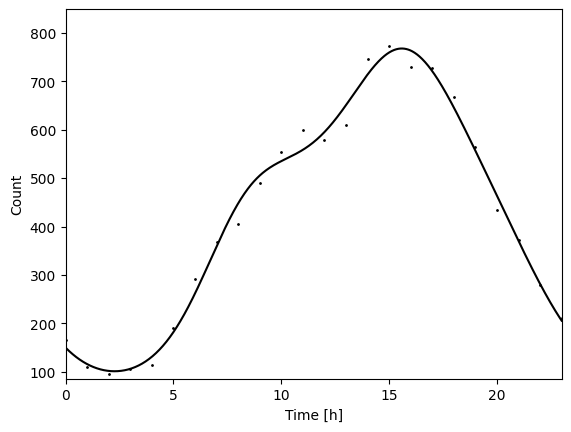

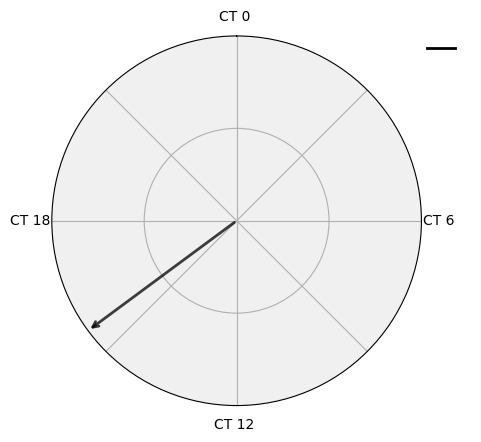

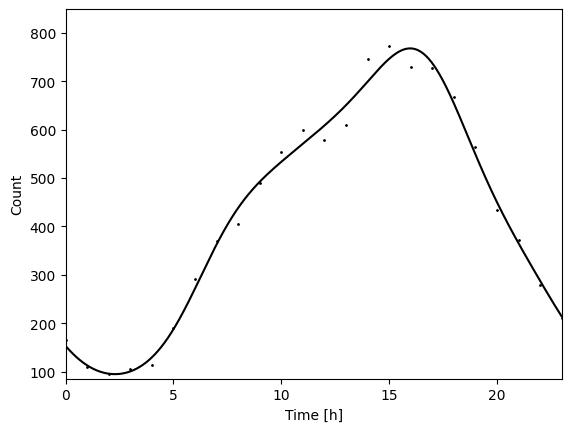

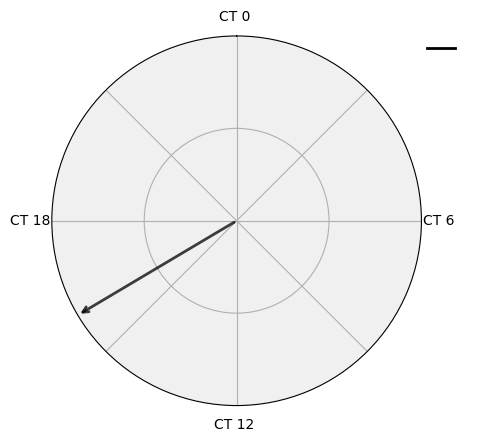

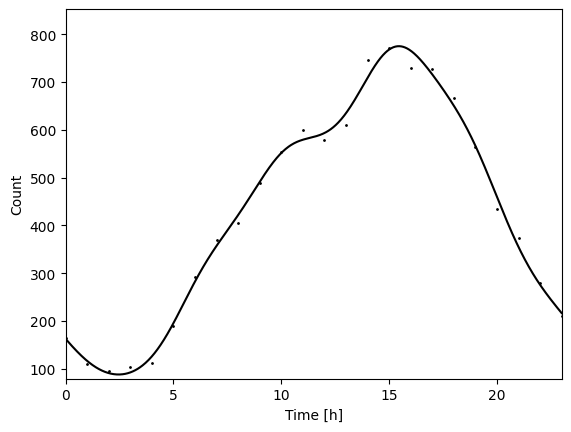

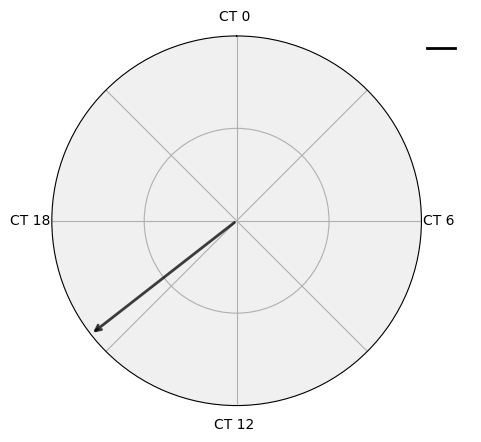

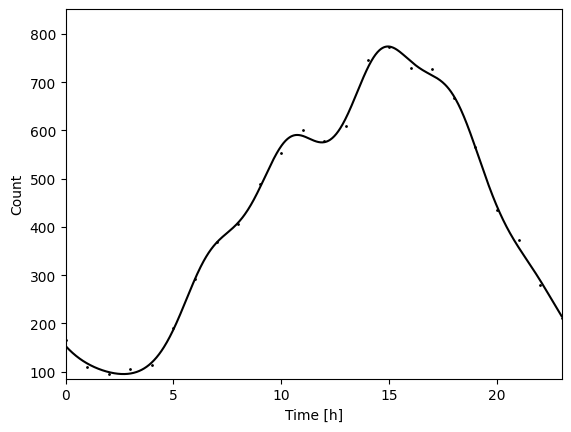

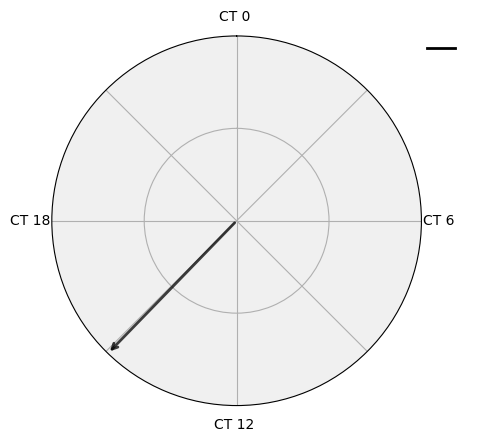

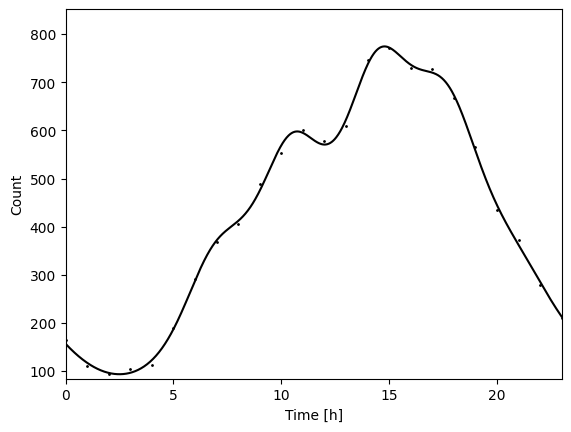

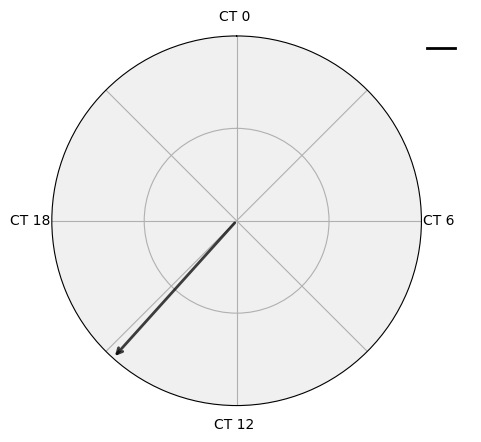

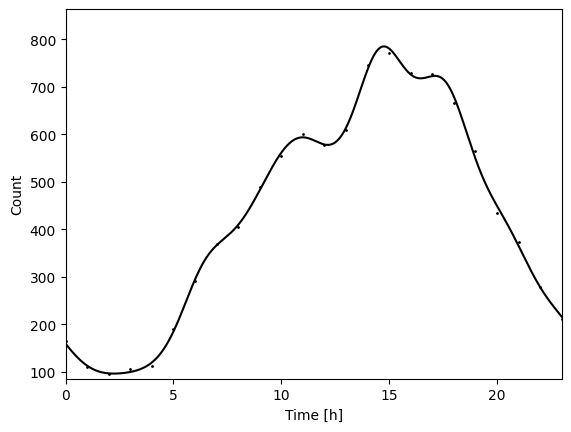

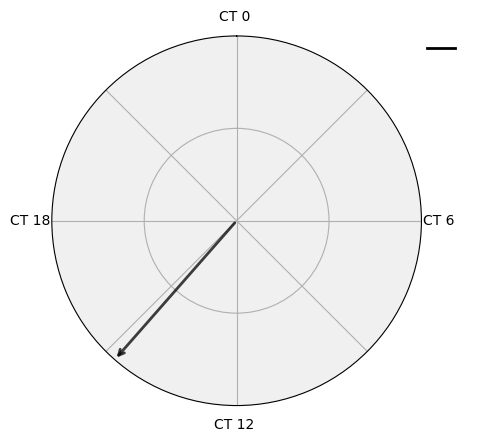

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


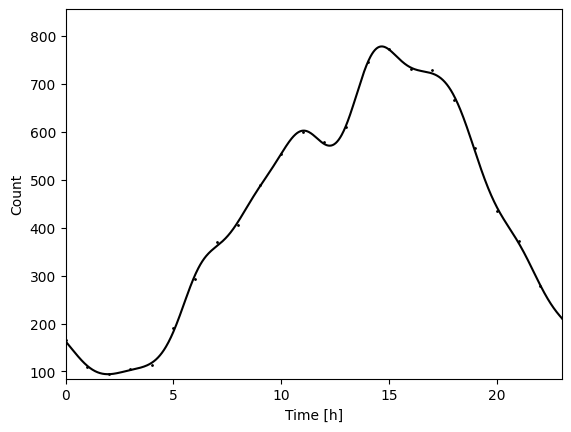

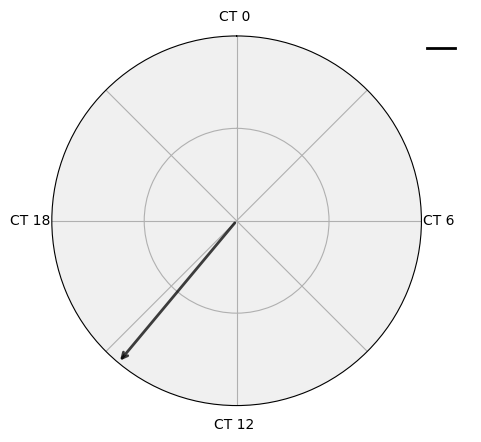

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


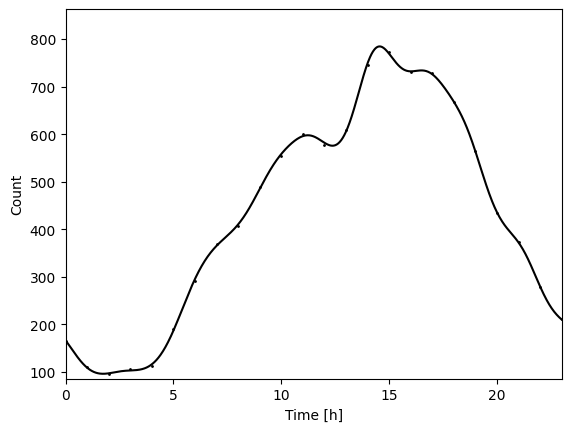

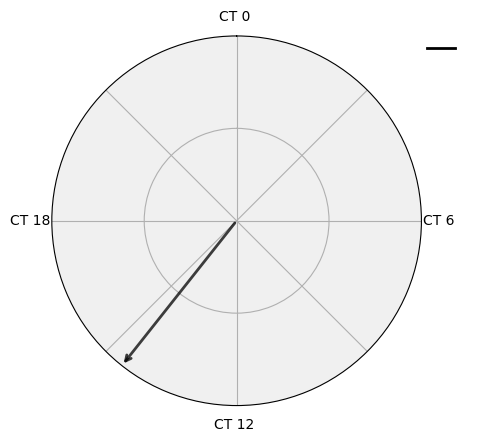

In [6]:
X = df_plot.x.to_numpy()
Y = df_plot.y.to_numpy()

df_results = pd.DataFrame(columns=[
    'test', 'period', 'n_components', 'p', 'q', 'RSS', 
    'log-likelihood', 'prsquared', 'amplitude', 'acrophase', 
    'mesor', 'peaks', 'heights', 'troughs', 'heights2'
], dtype=float)


numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in numbers:
    results, statistics, rhythm_param, _, _ = cosinor.fit_me(X, Y, n_components = i, period = 24, model_type = 'gen_poisson', plot_margins=False)
    #result_table.append(result)

    # print("Statistics:", statistics.keys())
    # print("Rhythm parameters:", rhythm_param.keys())
    # print("Results attributes:", dir(results))

    df_results = df_add_row(df_results, {
        'test': 'HourlyAccidentsSummer', 
        'period': 24,
        'n_components': i,
        'p': statistics['p'], 
        'RSS': statistics['RSS'],
        'log-likelihood': results.llf,        
        'prsquared': results.prsquared,  # Alternative to R²
        'amplitude': rhythm_param['amplitude'],
        'acrophase': rhythm_param['acrophase'],
        'mesor': rhythm_param['mesor'],
        'peaks': rhythm_param['peaks'],
        'heights': rhythm_param['heights'],
        'troughs': rhythm_param['troughs'],
        'heights2': rhythm_param['heights2']
    })


df_results.q = multi.multipletests(df_results.p, method = 'fdr_bh')[1]

In [7]:
display(df_results)

,test,period,n_components,p,q,RSS,log-likelihood,prsquared,amplitude,acrophase,mesor,peaks,heights,troughs,heights2
0,HourlyAccidentsSummer,24.0,1.0,6.132495e-14,6.132495e-14,107323.341863,-134.803843,0.184127,326.306656,2.484343,487.670973,[14.51051051051051],[813.977628860914],[2.4984984984984986],[161.36431736816385]
1,HourlyAccidentsSummer,24.0,2.0,9.647840e-21,1.071982e-20,21878.120101,-115.206666,0.302735,312.610185,1.981185,427.029380,[16.43243243243243],[739.630617301198],[1.8738738738738738],[114.42300168362273]
2,HourlyAccidentsSummer,24.0,3.0,1.926986e-23,2.752837e-23,11562.889411,-105.399752,0.362089,333.439262,2.207606,434.387733,[15.567567567567567],[767.8196035196897],[2.2582582582582584],[100.94847053057434]
3,HourlyAccidentsSummer,24.0,4.0,4.276269e-23,5.345337e-23,11045.666962,-103.074422,0.376163,336.618718,2.106974,431.423113,[15.951951951951951],[768.028849999599],[2.3063063063063063],[94.80859527952687]
4,HourlyAccidentsSummer,24.0,5.0,4.596516e-24,7.660860e-24,6282.216471,-97.761130,0.408320,343.202703,2.232764,431.615874,[15.471471471471471],[774.8037431939238],[2.4504504504504503],[88.41317104150815]
5,HourlyAccidentsSummer,24.0,6.0,6.205830e-27,1.551457e-26,2132.012731,-87.861033,0.468239,339.351203,2.371132,434.532490,"[10.714714714714715, 14.942942942942944]","[590.5439397841573, 773.8836931852676]",[2.6906906906906904],[95.1812877666934]
6,HourlyAccidentsSummer,24.0,7.0,9.865735e-27,1.973147e-26,1596.366070,-85.582294,0.482030,340.403606,2.408869,433.972824,"[10.714714714714715, 14.7987987987988]","[597.7683290100363, 774.3686729071987]",[2.4984984984984986],[93.56921856168084]
7,HourlyAccidentsSummer,24.0,8.0,8.183186e-28,2.727729e-27,1250.995139,-80.195386,0.514633,344.547225,2.421448,440.845844,"[11.003003003003004, 14.75075075075075, 17.105...","[593.9396109418209, 785.3930685954786, 723.355...",[2.2582582582582584],[96.30219697787646]
8,HourlyAccidentsSummer,24.0,9.0,1.075636e-29,5.378180e-29,605.507910,-72.830879,0.559206,341.716023,2.446606,436.035020,"[11.05105105105105, 14.654654654654655]","[602.1933643801758, 777.7510428046243]",[1.96996996996997],[94.31899753339245]
9,HourlyAccidentsSummer,24.0,10.0,3.924875e-34,3.924875e-33,187.727795,-59.032687,0.642716,344.364036,2.471764,440.264128,"[11.243243243243244, 14.558558558558559, 16.48...","[597.7126389805161, 784.6281642195261, 734.121...",[1.7297297297297298],[95.9000922261005]


### Katero je najboljše število komponent

In [8]:
df_best_model = cosinor.get_best_models(df_plot, df_results, n_components = [1,2,3,4,5,6,7,8,9,10])
df_best_model

,test,period,n_components,p,q,RSS,log-likelihood,prsquared,amplitude,acrophase,mesor,peaks,heights,troughs,heights2
0,HourlyAccidentsSummer,24.0,6.0,6.205830e-27,1.551457e-26,2132.012731,-87.861033,0.468239,339.351203,2.371132,434.53249,"[10.714714714714715, 14.942942942942944]","[590.5439397841573, 773.8836931852676]",[2.6906906906906904],[95.1812877666934]


c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\CosinorPy\cosinor.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))


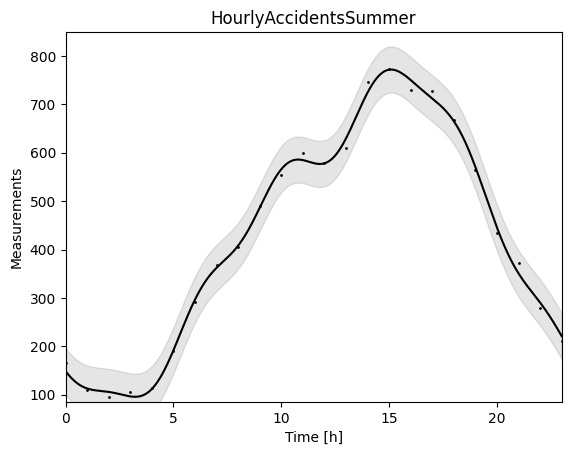

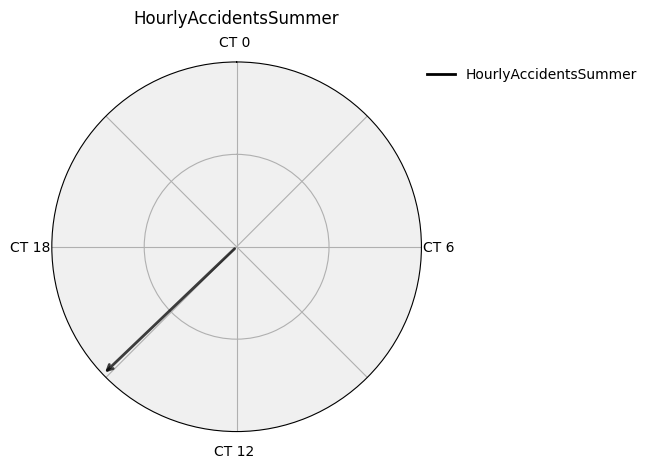

In [9]:
cosinor.plot_df_models(df_plot, df_best_model)

## RhythmCount

In [10]:
# Ustvari pandas dataframe v formatu, ki bo primeren za uporabo RhythmCount
df_plot_RC = pd.DataFrame({
    "test": "HourlyAccidentsSummer",  # konstantna oznaka vseh vrstic
    "X": accidents_per_hour.index,  # Ura (od 0 do 23)
    "Y": accidents_per_hour.values  # Število nesreč za tisto uro
})

In [11]:
count_models = ['gen_poisson', 'nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

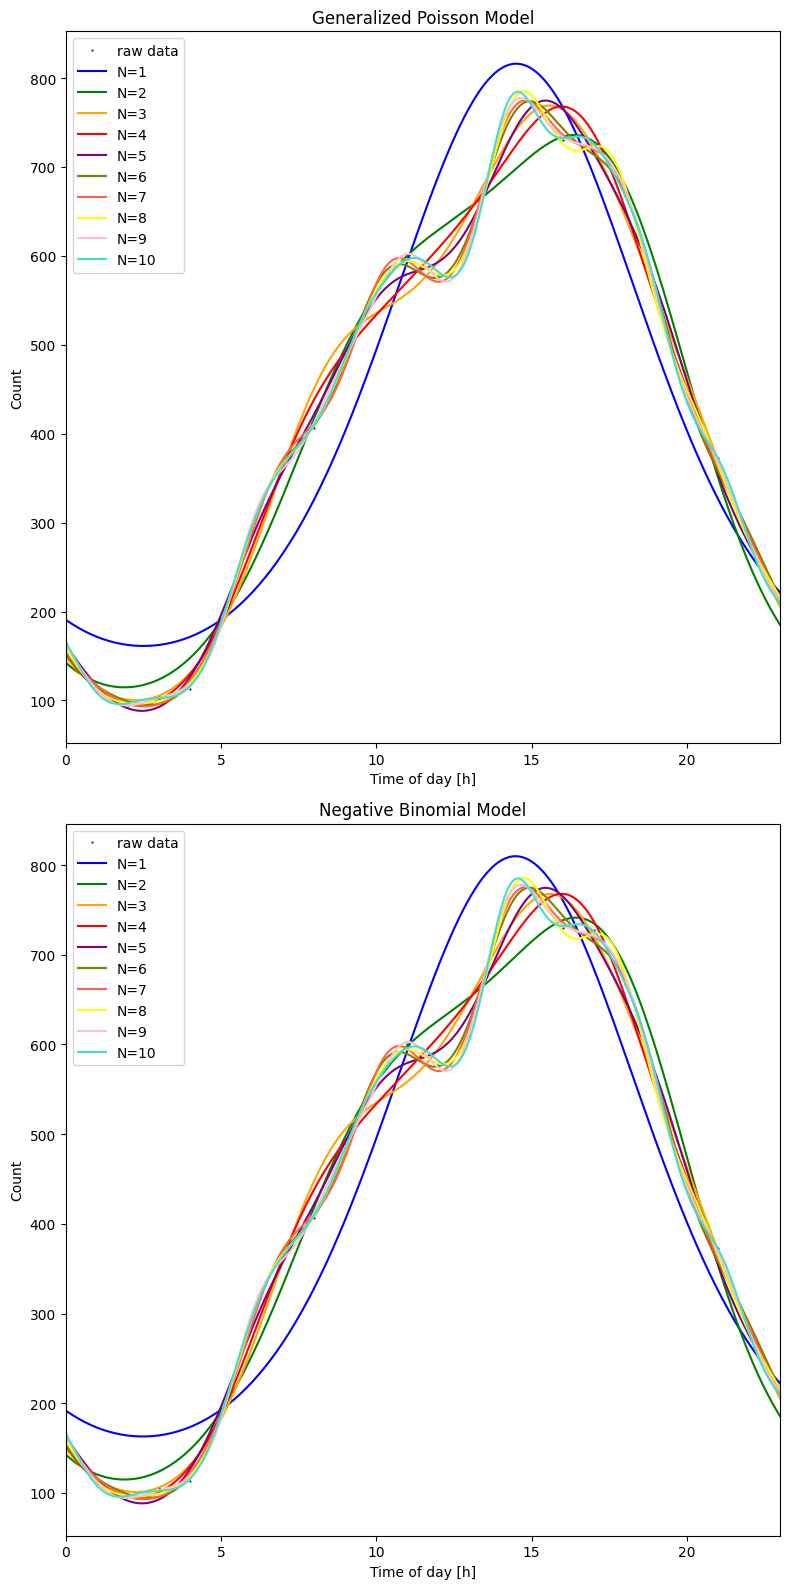

In [12]:
df_results_RC = dproc.fit_to_models(df_plot_RC, count_models, n_components, 24)

In [13]:
display(df_results_RC)

,count_model,n_components,amplitude,mesor,peaks,heights,llr_pvalue,RSS,AIC,BIC,log_likelihood,logs,mean(est),Y(est),X_test,Y_test
0,gen_poisson,1,327.42,488.72,[14.51],[816.14],6.144719e-14,108136.528766,277.611668,282.323883,-134.805834,"[-4.806121636167745, -5.451046023520917, -5.74...",424.927749,"[190.85229818008395, 171.6419021805019, 162.44...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[190.85229818008395, 188.43698175671798, 186.1..."
1,gen_poisson,2,310.60,425.39,[16.32],[735.99],1.228186e-20,21748.814672,242.905787,249.974110,-115.452893,"[-4.664353083126002, -3.846062176101924, -4.42...",423.582740,"[142.62760100046566, 120.66062237598328, 114.8...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[142.62760100046566, 139.59213189105265, 136.7..."
2,gen_poisson,3,334.43,434.69,[15.62],[769.12],3.325705e-23,11759.089850,227.928229,237.352660,-105.964115,"[-4.346763992411979, -3.314307848770227, -3.31...",424.509838,"[149.2441156230054, 115.0534881187107, 100.899...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[149.2441156230054, 144.8442230169654, 140.667..."
3,gen_poisson,4,336.58,431.41,[16.02],[767.98],4.545239e-23,11046.032930,226.276926,238.057465,-103.138463,"[-3.925707997991964, -3.213347980558595, -3.09...",424.208333,"[153.02291981497834, 112.88861869499367, 95.71...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[153.02291981497834, 147.9652531826444, 143.13..."
4,gen_poisson,5,343.18,431.50,[15.42],[774.68],7.884909e-24,6272.317667,220.668785,234.805431,-98.334392,"[-3.374168775082353, -3.4170890374972913, -3.1...",424.208333,"[163.08011679953626, 116.80513179366783, 91.20...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[163.08011679953626, 157.8845320670972, 152.77..."
5,gen_poisson,6,339.48,434.44,"[10.71, 14.91]","[590.66, 773.92]",1.122422e-24,2130.854743,214.853767,231.346521,-93.426884,"[-3.929903991227036, -3.419505701931996, -3.19...",424.208333,"[152.98499202846588, 116.83808264885177, 98.95...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[152.98499202846588, 148.24979721872228, 143.7..."
6,gen_poisson,7,340.68,433.96,"[10.71, 14.81]","[597.67, 774.63]",7.677061e-24,1591.867454,217.602810,236.451671,-92.801405,"[-3.6403498588665286, -3.4399153720866877, -3....",424.208333,"[156.48562236271425, 117.11074646626155, 96.10...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[156.48562236271425, 151.7740795904866, 147.23..."
7,gen_poisson,8,344.44,440.81,"[11.01, 14.71, 17.12]","[594.11, 785.25, 723.53]",2.892434e-23,1244.318163,219.338656,240.543625,-91.669328,"[-3.5033893717042304, -3.210801648913801, -3.1...",424.208333,"[158.86524681353112, 112.9595215936447, 96.849...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[158.86524681353112, 153.22820678750597, 147.7..."
8,gen_poisson,9,341.63,436.18,"[11.01, 14.61]","[602.36, 777.81]",1.189694e-22,606.053223,221.504725,245.065802,-90.752363,"[-3.3764863524571354, -3.1832060753577593, -3....",424.208333,"[162.921426156454, 111.98763978699672, 94.5500...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[162.921426156454, 157.48118876766836, 151.958..."
9,gen_poisson,10,344.31,440.19,"[11.21, 14.51, 16.52]","[597.66, 784.5, 734.23]",5.186296e-22,187.895288,224.016877,249.934062,-90.008439,"[-3.366783487484696, -3.1691439302149007, -3.1...",424.208333,"[166.0963371772577, 108.5720744066752, 96.8324...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[166.0963371772577, 159.85976402792278, 153.41..."


## Kateri model je najboljši?

#### Najprej pogledamo, kateri model je najboljši, nato kolikšno število komponent je najboljše.

In [14]:
best_count_model = dproc.get_best_count_model(df_results_RC, 'Vuong')
print("Best model: {}".format(best_count_model.count_model))
best_model = dproc.get_best_n_components(df_results_RC, 'Vuong', count_model=best_count_model['count_model'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 6


#### Najprej pogledamo, kolikšno število komponent je najboljše, nato, kateri model je najboljši. 

In [15]:
best_n_components = dproc.get_best_n_components(df_results_RC, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_count_model(df_results_RC, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.count_model))

Number of components: 6
Best model: gen_poisson


### Prikaz najboljšega modela skupaj z intervali zaupanja

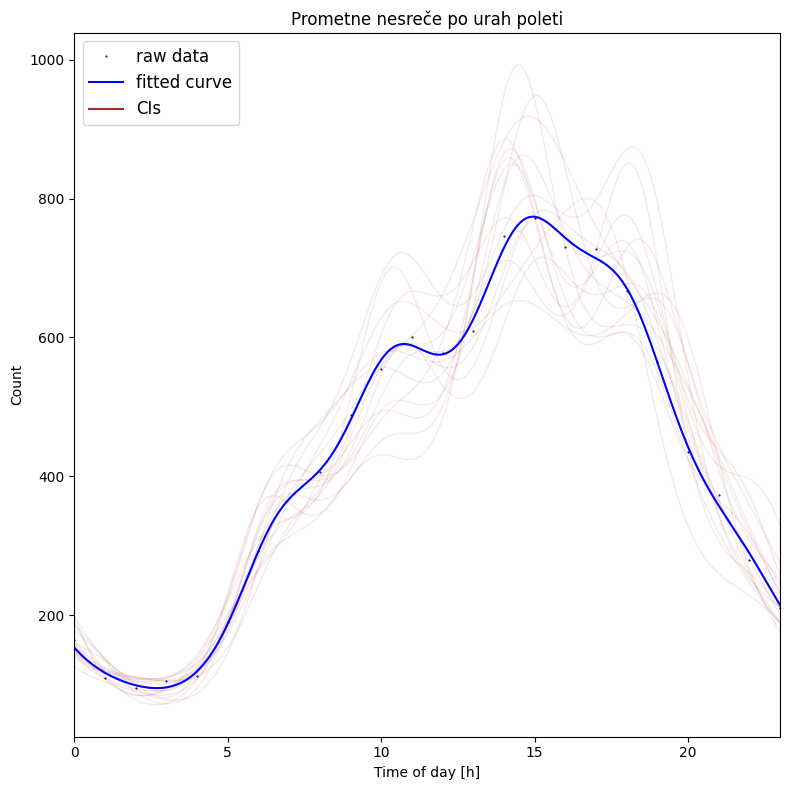

Intervali zaupanja:


,0,1
0,5.803458,5.909711
1,-0.615723,-0.448278
2,-0.823892,-0.661412
3,-0.312123,-0.109460
4,-0.216441,-0.115605
5,-0.190700,0.024529
6,0.018519,0.121398
7,-0.074440,0.069342
8,0.009314,0.100114
9,-0.027324,0.081664


In [16]:
# print(type(best_model))
# print(type(best_n_components))

# print(best_n_components)

count_model = best_model.count_model
n_components = int(best_n_components.n_components)

CIs = plot.plot_model(df_plot_RC, count_model, n_components, title='Prometne nesreče po urah poleti', plot_CIs=True)
print('Intervali zaupanja:')
display(CIs)

### Parametri izbranega modela

In [17]:
CIs_params = dproc.calculate_confidence_intervals_parameters(df_plot_RC, n_components, count_model, best_model['peaks'])
best_model = pd.concat([best_model, pd.Series(CIs_params)], axis=0)
best_model=best_model[['count_model','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
print('Parametri modela in njihovi intervali zaupanja:')
display(best_model.to_frame())

c:\Users\Hana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Parametri modela in njihovi intervali zaupanja:


,0
count_model,gen_poisson
n_components,6
amplitude,339.48
mesor,434.44
peaks,"[10.71, 14.91]"
heights,"[590.66, 773.92]"
amplitude_CIs,"[316.02, 372.33]"
mesor_CIs,"[410.08, 462.08]"
peaks_CIs,"[[10.41, 11.03], [13.81, 15.99]]"
heights_CIs,"[[556.64, 643.98], [742.55, 817.82]]"
